# Module 1 Exercises

Filipp Krasovsky,July 5th, 2021

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.preprocessing import OrdinalEncoder
from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

# Animal Shelter Data 

 Load and describe the data:

In this section, we see all the data at once using pd.describe(). In the next section, the data are imported and cleaned up a bit using pandas.

In [2]:
shelter_data = pd.read_csv('shelter_data.csv')
shelter_data.describe()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
count,26729,19038,26729,26729,13117,26729,26728,26711,26729,26729
unique,26729,6374,22918,5,16,2,5,44,1380,366
top,A705865,Max,2015-08-11 00:00:00,Adoption,Partner,Dog,Neutered Male,1 year,Domestic Shorthair Mix,Black/White
freq,1,136,19,10769,7816,15595,9779,3969,8810,2824


In [3]:
# this line drops any rows with missing data
cleaned_shelter_data = shelter_data.dropna()

# here we grab the data we want from pandas
X_data = cleaned_shelter_data[['AnimalType','SexuponOutcome','AgeuponOutcome']]
y_data = cleaned_shelter_data[['OutcomeType']]

enc = OrdinalEncoder()
enc.fit(X_data)

le = preprocessing.LabelEncoder()
le.fit(y_data)

shelter_categorical = pd.DataFrame(enc.transform(X_data),
                                   columns=list(X_data))
X=shelter_categorical
y=le.transform(y_data)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=42)

C:\Users\13234\Miniconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\13234\Miniconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Here we use scikit - learn. Notice how all the functions have similar common functions, like train and predict: we'll use these later to compare different classification models. Note also that clf will contain the trained model: how would you keep several trained models around and apply them in a 'pythonic' way later?

In [4]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print('accuracy %2.2f ' % accuracy_score(y_test,y_pred))

accuracy 0.73 


In [5]:
cm = confusion_matrix(le.inverse_transform(y_test), le.inverse_transform(y_pred))
labels=['Adoption', 'Died', 'Euthanasia', 'Transfer']

test_results = pd.DataFrame(cm,index=labels,columns=labels)
display(test_results)

,Adoption,Died,Euthanasia,Transfer
Adoption,476,0,10,365
Died,3,0,1,31
Euthanasia,10,0,42,309
Transfer,164,0,40,2039


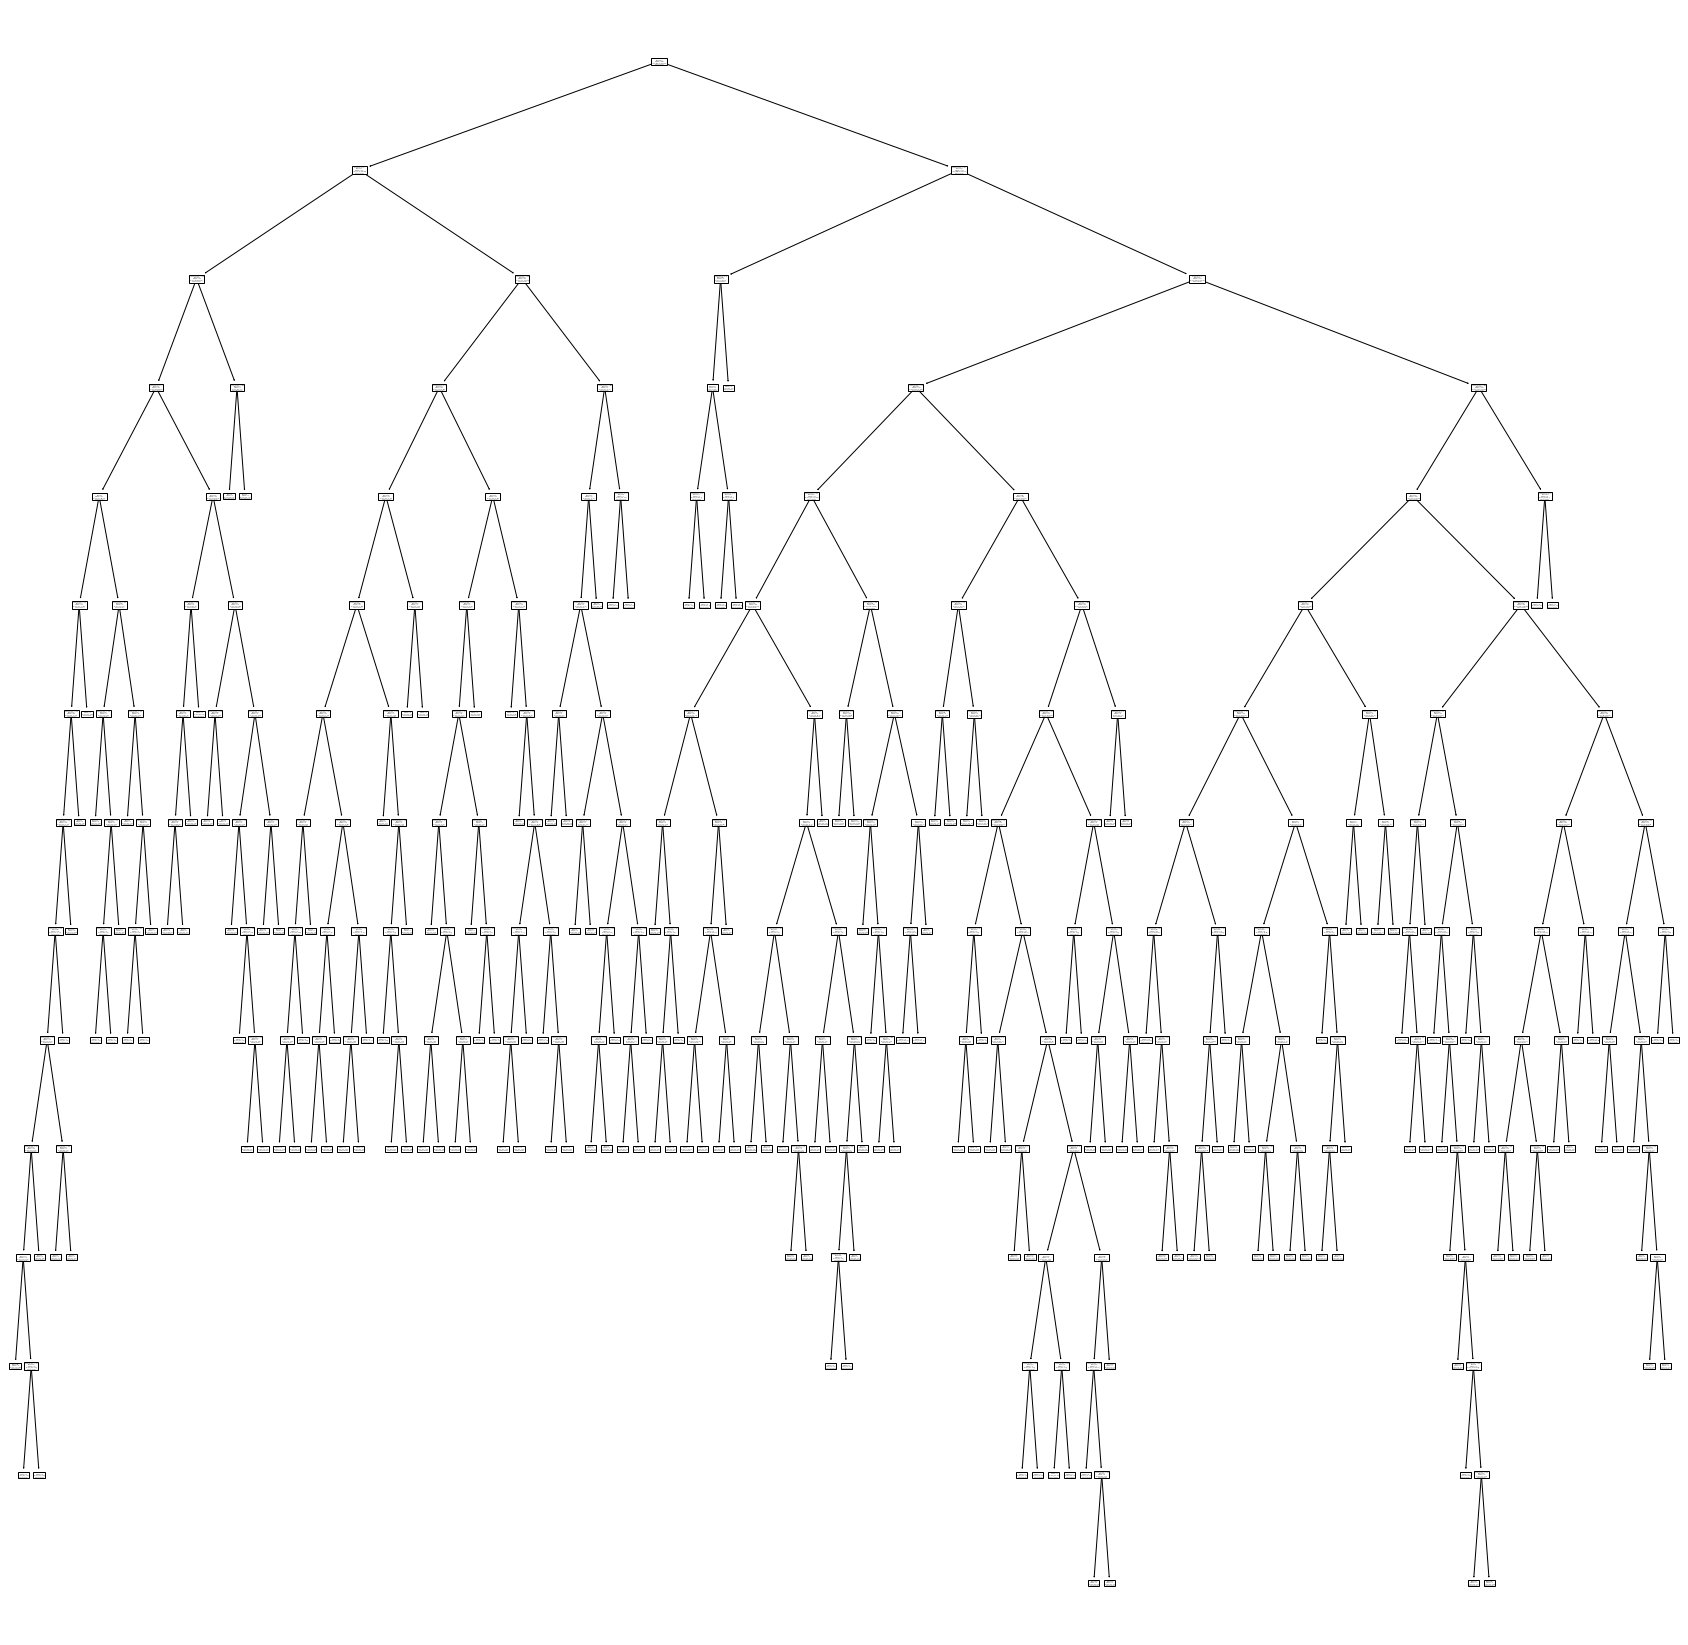

In [6]:

fig,ax = plt.subplots(figsize = (30,30))

treeplot = tree.plot_tree(clf, feature_names=['AnimalType','SexuponOutcome','AgeuponOutcome'],
              class_names = ['Adoption', 'Died', 'Euthanasia', 'Transfer'],ax=ax) 

Look at the decision trees built (above) - it's a large plot that's too small to see (that's ok for now). This unreadable plot is okay for the point we're trying to make here, that this might be too complex of a model, but in general try to avoid plots like this..

Anyway, we want a simpler decision tree, so the first thing we're going to do is vary the decision tree depth.

# Solution 1.1

In [7]:
#train a new decision tree with a maximum depth of 3 
short_tree = tree.DecisionTreeClassifier(max_depth=3)
short_tree = short_tree.fit(X_train,y_train)
short_pred = short_tree.predict(X_test)

#display accuracy
print('accuracy %2.2f ' % accuracy_score(y_test,short_pred))

accuracy 0.66 


In [8]:
#confusion matrix
cm = confusion_matrix(le.inverse_transform(y_test), le.inverse_transform(short_pred))
labels=['Adoption', 'Died', 'Euthanasia', 'Transfer']

test_results = pd.DataFrame(cm,index=labels,columns=labels)
display(test_results)

,Adoption,Died,Euthanasia,Transfer
Adoption,65,0,0,786
Died,0,0,0,35
Euthanasia,0,0,1,360
Transfer,3,0,1,2239


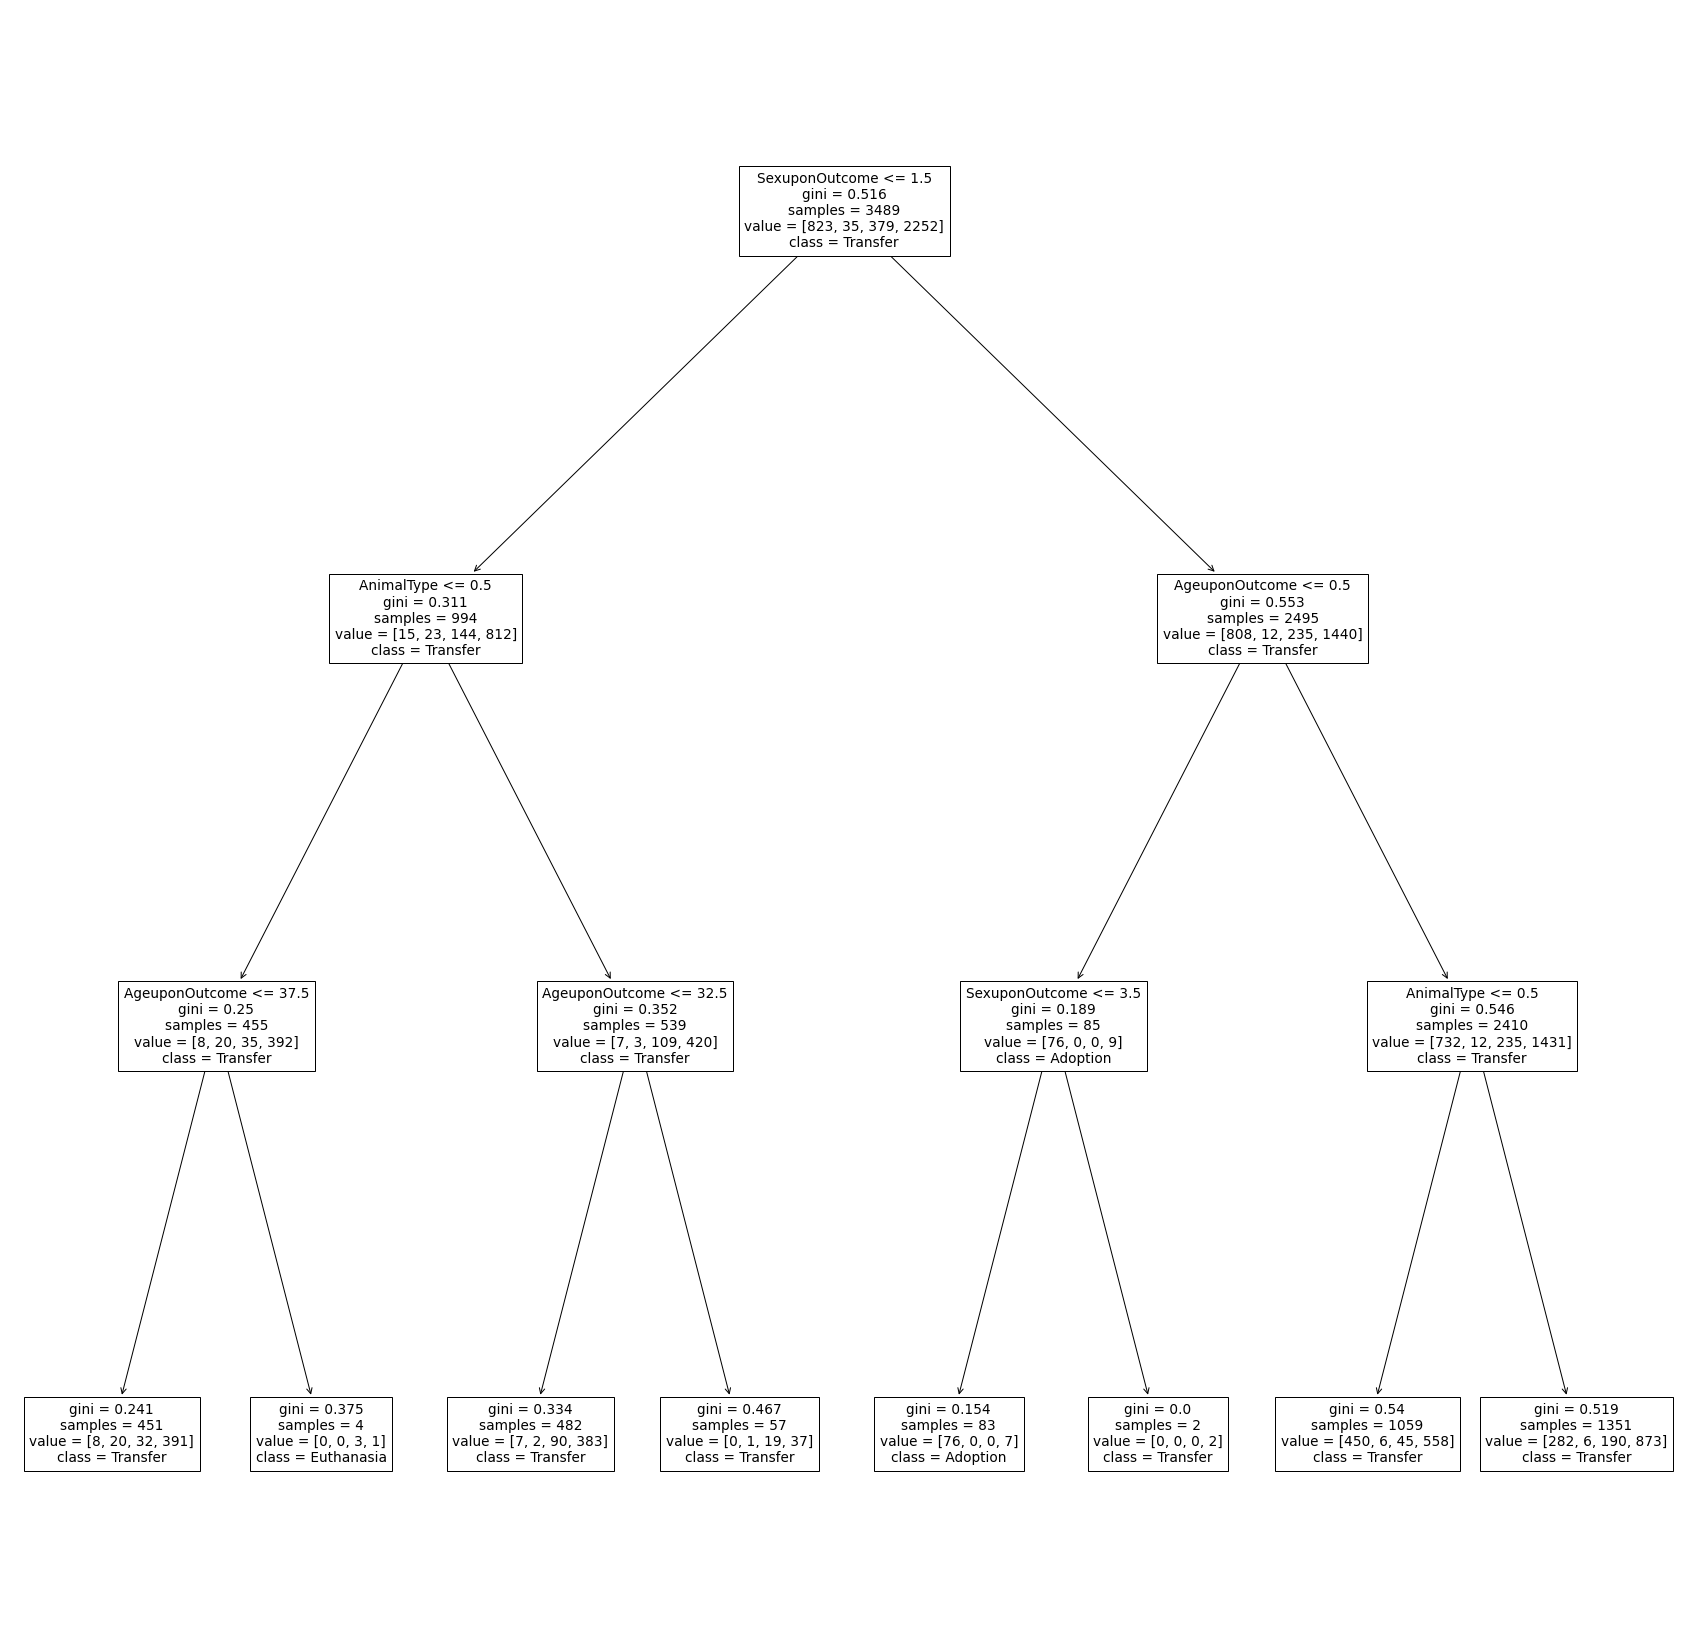

In [9]:
#tree plot
fig,ax = plt.subplots(figsize = (30,30))

treeplot = tree.plot_tree(short_tree, feature_names=['AnimalType','SexuponOutcome','AgeuponOutcome'],
              class_names = ['Adoption', 'Died', 'Euthanasia', 'Transfer'],ax=ax) 

# Solution 1.2 : Varying Tree Depth


In [10]:
#loop through depth values of 3 to 10 and train the decision tree. plot the training and test error.
#init an empty array of size 8 for both the training and test errors.
train_errors = []
test_errors  = []
x_axis = range(3,10+1)

In [11]:
for i in range(3,10+1):
    #train with depth i and predict.
    this_tree = tree.DecisionTreeClassifier(max_depth=i)
    this_tree = this_tree.fit(X_train,y_train)
    this_pred = this_tree.predict(X_test)
    #acquire test and train error.
    this_train_error = 1 - this_tree.score(X_train,y_train)
    this_test_error  = 1 - accuracy_score(y_test,this_pred)
    #add to array(s)
    train_errors.append(this_train_error)
    test_errors.append(this_test_error)

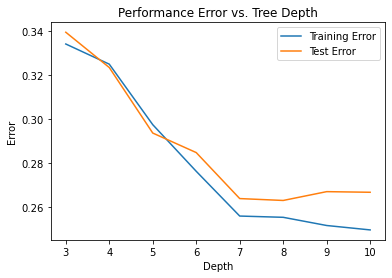

In [12]:
#plot our training and test errors
plt.plot(x_axis, train_errors, label = "Training Error")
plt.plot(x_axis, test_errors, label = "Test Error")
plt.legend()
plt.xlabel("Depth")
plt.ylabel("Error")
plt.title("Performance Error vs. Tree Depth")
plt.show()

This is a plot of test and training error as a function of increasing tree depth. We observe that the orange line (testing error) decreases until a depth of 7, suggesting that a decision tree of depth 7 would be optimal with respect to optimizing accuracy. Our training error decreases consistently as depth increases. Our minimum test error is about 26%, suggesting that our best accuracy would be:

In [13]:
round(1-min(test_errors),2)

0.74

# Solution 1.3 Pruned Decision Tree

Plot a pruned and the original decision tree. Use matplotlib - display inline in your jupyter notebook, and export the notebook to a pdf. Make sure the resolution and settings are such that the text of all plots is easily readable! 

In [14]:
#retrain our decision tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
clf_accuracy = accuracy_score(y_test,y_pred)

#get a list of alphas
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [15]:
clfs = []
for ccp_alpha in ccp_alphas:
    this_clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    this_clf.fit(X_train, y_train)
    clfs.append(this_clf)

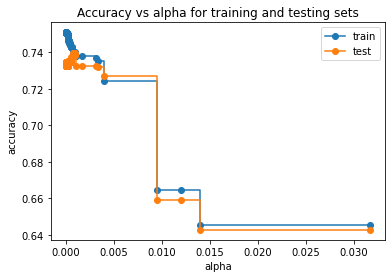

In [16]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

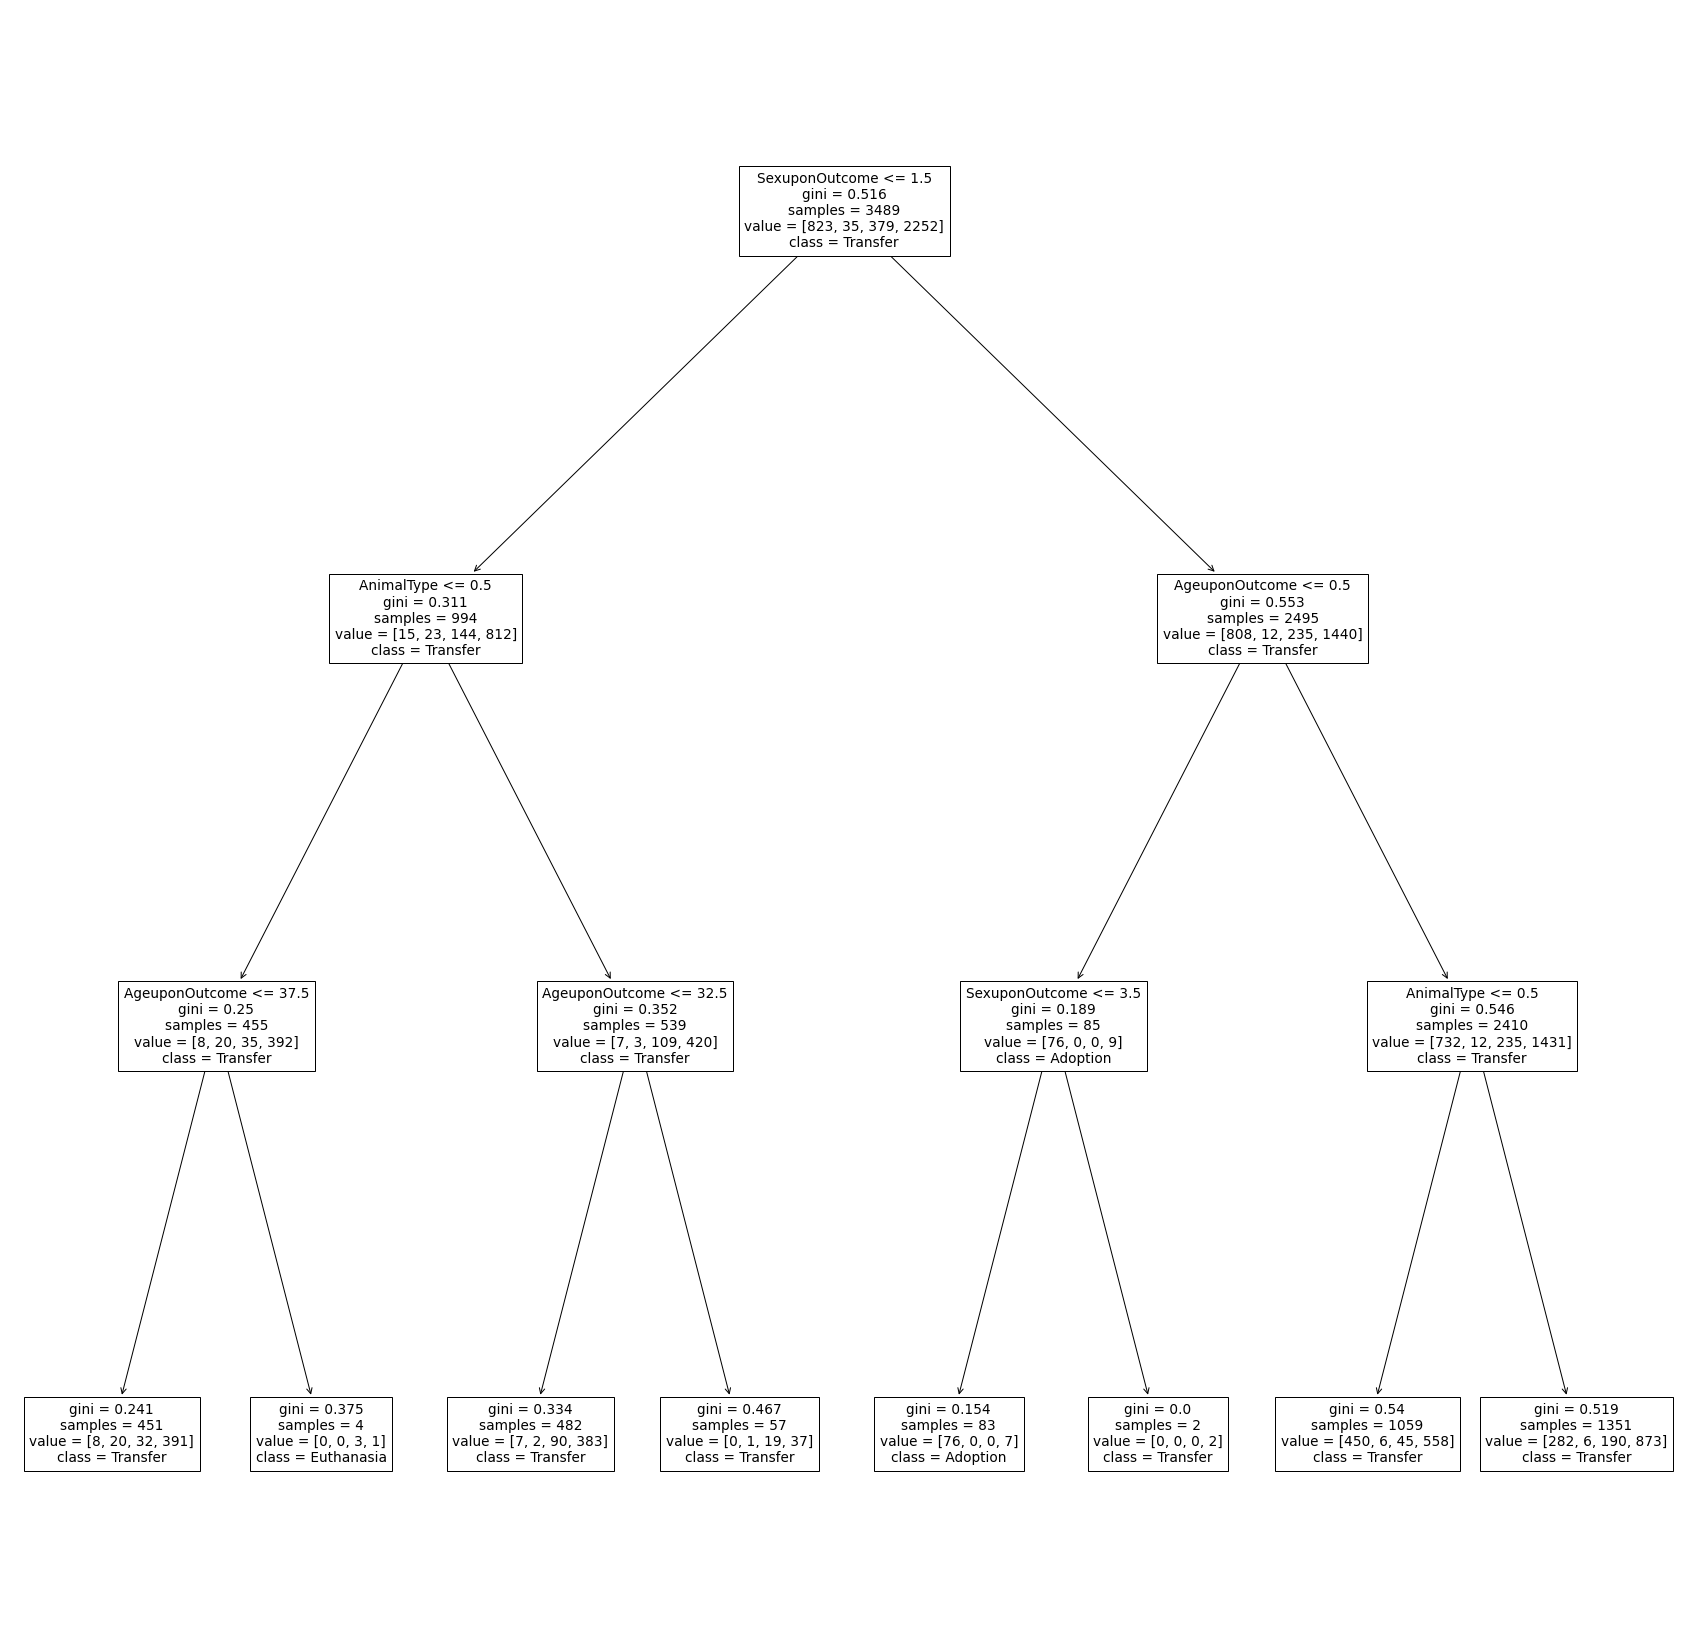

In [17]:
#plot a pruned tree w/ ccp_alpha ~ 0.0007
clf_prune = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=0.0007)
clf_prune.fit(X_train, y_train)
prune_pred = clf_prune.predict(X_test)

#accuracy
prune_accuracy = accuracy_score(y_test,prune_pred)

#tree plot
fig,ax = plt.subplots(figsize = (30,30))

treeplot = tree.plot_tree(short_tree, feature_names=['AnimalType','SexuponOutcome','AgeuponOutcome'],
              class_names = ['Adoption', 'Died', 'Euthanasia', 'Transfer'],ax=ax) 

In [18]:
#get confusion matrices for pruned and unpruned tree
cm = confusion_matrix(le.inverse_transform(y_test), le.inverse_transform(y_pred))
labels=['Adoption', 'Died', 'Euthanasia', 'Transfer']

test_results = pd.DataFrame(cm,index=labels,columns=labels)
display(test_results)

cm_prune = confusion_matrix(le.inverse_transform(y_test), le.inverse_transform(prune_pred))
labels=['Adoption', 'Died', 'Euthanasia', 'Transfer']

test_results_prune = pd.DataFrame(cm_prune,index=labels,columns=labels)
display(test_results_prune)

,Adoption,Died,Euthanasia,Transfer
Adoption,476,0,10,365
Died,3,0,1,31
Euthanasia,10,0,42,309
Transfer,164,0,40,2039


,Adoption,Died,Euthanasia,Transfer
Adoption,463,0,17,371
Died,3,0,2,30
Euthanasia,7,0,33,321
Transfer,136,0,30,2077


In [19]:
print(clf_accuracy,prune_accuracy)

0.7326647564469914 0.7372492836676218


It appears that, all else held constant, pruning slightly increases the accuracy of decision tree, but not significantly enough for us to be confident. We can observe if this assumption holds by iterating over tree depth with a pruning hyperparameter and plotting.

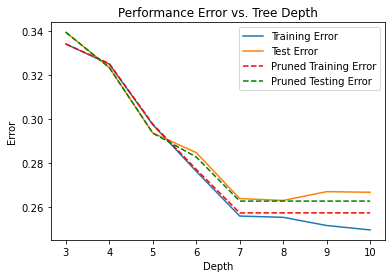

In [20]:
train_errors = []
test_errors  = []
prune_train  = []
prune_test   = []

x_axis = range(3,10+1)

for i in range(3,10+1):
    #train with depth i and predict.
    this_tree = tree.DecisionTreeClassifier(max_depth=i)
    this_tree = this_tree.fit(X_train,y_train)
    this_pred = this_tree.predict(X_test)
    #acquire test and train error.
    this_train_error = 1 - this_tree.score(X_train,y_train)
    this_test_error  = 1 - accuracy_score(y_test,this_pred)
    #add to array(s)
    train_errors.append(this_train_error)
    test_errors.append(this_test_error)
    
    #repeat, but with our pruning parameter:
    this_prune = tree.DecisionTreeClassifier(max_depth=i,ccp_alpha=0.0007)
    this_prune = this_prune.fit(X_train,y_train)
    this_prune_pred = this_prune.predict(X_test)
    prune_train_error = 1 - this_prune.score(X_train,y_train)
    prune_test_error = 1 - accuracy_score(y_test,this_prune_pred)
    #add to array 
    prune_train.append(prune_train_error)
    prune_test.append(prune_test_error)
    
#plot our training and test errors
plt.plot(x_axis, train_errors, label = "Training Error")
plt.plot(x_axis, test_errors, label = "Test Error")
plt.plot(x_axis, prune_train,"r--",label="Pruned Training Error")
plt.plot(x_axis, prune_test,"g--",label="Pruned Testing Error")

plt.legend()
plt.xlabel("Depth")
plt.ylabel("Error")
plt.title("Performance Error vs. Tree Depth")
plt.show()

In [21]:
print(1-min(prune_test))

0.7372492836676218


We can therefore provide evidence that pruning significantly decreases the testing error for larger depths of a tree.

# Text Data

In [22]:
text_data = pd.read_csv('text_data.csv',index_col=0).drop('meta_title',axis=1)

In [23]:
display(text_data)

,meta_author,000,10,11,13,136,13th,1648,1683,1685,...,yielding,yoke,yokes,york,young,yourselves,zaleucus,zeal,zealand,zealous
0,hamilton,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,3,0,0
1,jay,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,jay,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
3,jay,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,jay,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,hamilton,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0
81,hamilton,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0
82,hamilton,0,0,0,0,0,0,0,0,0,...,0,0,0,5,0,0,0,0,0,0
83,hamilton,0,0,0,0,1,0,0,0,0,...,0,0,0,3,0,0,0,2,0,0


The text data used here is the text of the Federalist papers, and meta_author is the (believed) author of these documents. Each column is the number of times that word was used in this document. This common format for text data is called a "bag-of-words" model. 

In [24]:
X = text_data.drop('meta_author',axis=1)


le = preprocessing.LabelEncoder()
labels = text_data['meta_author']
le.fit(labels)
y=le.transform(labels)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

u_labels = le.classes_

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

print('train accuracy %f test accuracy %f' %(accuracy_score(y_pred_train,y_train),accuracy_score(y_pred_test,y_test)))

train accuracy 1.000000 test accuracy 0.444444


Although the train results (above) look good, the test accuracy is terrible!

Notice we can use inverse_transform to make our predictions human-readable again.

In [25]:
print(le.inverse_transform(y_pred))

['hamilton' 'hamilton' 'madison with hamilton' ... 'hamilton'
 'madison with hamilton' 'madison with hamilton']


# 2.2 Solution 

To get the plot of accuracy, you can re-use your code from earlier. Make sure to set test size to 0.10.



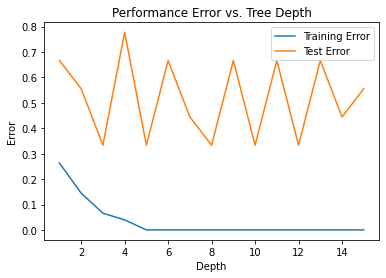

In [26]:
train_errors = []
test_errors  = []
x_axis = range(1,15+1)

for i in x_axis:
    #train with depth i and predict.
    this_tree = tree.DecisionTreeClassifier(max_depth=i)
    this_tree = this_tree.fit(X_train,y_train)
    this_pred = this_tree.predict(X_test)
    #acquire test and train error.
    this_train_error = 1 - this_tree.score(X_train,y_train)
    this_test_error  = 1 - accuracy_score(y_test,this_pred)
    #add to array(s)
    train_errors.append(this_train_error)
    test_errors.append(this_test_error)
    
#plot our training and test errors
plt.plot(x_axis, train_errors, label = "Training Error")
plt.plot(x_axis, test_errors, label = "Test Error")
plt.legend()
plt.xlabel("Depth")
plt.ylabel("Error")
plt.title("Performance Error vs. Tree Depth")
plt.show()

It's evident from the test accuracy that despite an increasingly more robust training performance, our test error does not converge on any particular value.

# 2.2.2 Starting Code

In [27]:
text_frequecies = X.sum()
text_frequecies.sort_values()
display(text_frequecies)
kept_words = text_frequecies[text_frequecies<2]
# this line (above) first creates a binary vector for each word, telling us if it appears twice or more
# in the dataset. it then uses that vector to index into text_frequencies to subset only the data 
# for which this binary vector evaluates to TRUE. This simple indexing can really help to chop through
# a huge pandas dataframe.
print(kept_words)
small_vocab_X= X [kept_words.index]
# notice how kept_words.index is a list of strings, the same you can use to access the headers of X..

000            2
10             2
11             2
13             1
136            1
              ..
yourselves     1
zaleucus       1
zeal          26
zealand        1
zealous        8
Length: 8560, dtype: int64

13            1
136           1
13th          1
1648          1
1683          1
             ..
yes           1
yokes         1
yourselves    1
zaleucus      1
zealand       1
Length: 2975, dtype: int64


In [28]:
#sanity check
small_vocab_X.head()

,13,136,13th,1648,1683,1685,1706,1726,1774,1786,...,wrongs,wyoming,xv,yates,yeomanry,yes,yokes,yourselves,zaleucus,zealand
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


Text(0, 0.5, 'accuracy')

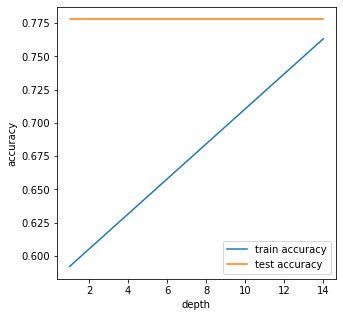

In [29]:
X_train, X_test, y_train, y_test = train_test_split(small_vocab_X, y, test_size=0.10, random_state=42)
accuracy_by_depth=[]

for depth in range(1,15):
    short_tree = tree.DecisionTreeClassifier(max_depth=depth,random_state=42)
    short_tree = short_tree.fit(X_train,y_train)
    y_pred = short_tree.predict(X_test)
    y_pred_train = short_tree.predict(X_train)
    accuracy_by_depth.append({'depth':depth,
                              'test_accuracy':accuracy_score(y_test,y_pred),
                              'train_accuracy':accuracy_score(y_train,y_pred_train)})
  

abd_df = pd.DataFrame(accuracy_by_depth)
abd_df.index = abd_df['depth']

fig,ax=plt.subplots(figsize=(5,5))

ax.plot(abd_df.depth,abd_df.train_accuracy,label='train accuracy')
ax.plot(abd_df.depth,abd_df.test_accuracy,label='test accuracy')
ax.legend()
ax.set_xlabel('depth')
ax.set_ylabel('accuracy')

# 2.2.2 Solution

Text(0, 0.5, 'accuracy')

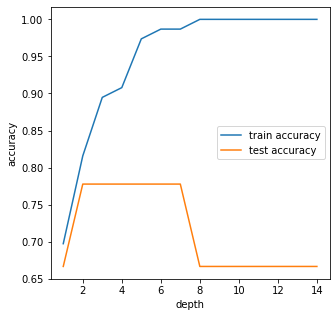

In [30]:
#use most frequently used words instead:
text_frequecies = X.sum()
text_frequecies.sort_values()
#display(text_frequecies)
kept_words = text_frequecies[text_frequecies>100]
large_vocab_X= X [kept_words.index]

X_train, X_test, y_train, y_test = train_test_split(large_vocab_X, y, test_size=0.10, random_state=42)
accuracy_by_depth=[]

for depth in range(1,15):
    short_tree = tree.DecisionTreeClassifier(max_depth=depth,random_state=42)
    short_tree = short_tree.fit(X_train,y_train)
    y_pred = short_tree.predict(X_test)
    y_pred_train = short_tree.predict(X_train)
    accuracy_by_depth.append({'depth':depth,
                              'test_accuracy':accuracy_score(y_test,y_pred),
                              'train_accuracy':accuracy_score(y_train,y_pred_train)})
  
    #repeat the training process and plot.
abd_df = pd.DataFrame(accuracy_by_depth)
abd_df.index = abd_df['depth']

fig,ax=plt.subplots(figsize=(5,5))

ax.plot(abd_df.depth,abd_df.train_accuracy,label='train accuracy')
ax.plot(abd_df.depth,abd_df.test_accuracy,label='test accuracy')
ax.legend()
ax.set_xlabel('depth')
ax.set_ylabel('accuracy')

In [31]:
#max accuracy occurs at around depth = 2 
round(max(abd_df.test_accuracy),2)

0.78


# Audio Data 


In [32]:
audio_data = pd.read_csv('audio_data.csv',index_col=0).drop(['label','filename'],axis=1)

X = audio_data.drop('label_text',axis=1)

le = preprocessing.LabelEncoder()
labels = audio_data['label_text']
le.fit(labels)
y=le.transform(labels)

u_labels = le.classes_

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=42)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)


In [33]:
# frequencies for audio data

f=np.array([    0.       ,    86.1328125,   172.265625 ,   258.3984375,
         344.53125  ,   430.6640625,   516.796875 ,   602.9296875,
         689.0625   ,   775.1953125,   861.328125 ,   947.4609375,
        1033.59375  ,  1119.7265625,  1205.859375 ,  1291.9921875,
        1378.125    ,  1464.2578125,  1550.390625 ,  1636.5234375,
        1722.65625  ,  1808.7890625,  1894.921875 ,  1981.0546875,
        2067.1875   ,  2153.3203125,  2239.453125 ,  2325.5859375,
        2411.71875  ,  2497.8515625,  2583.984375 ,  2670.1171875,
        2756.25     ,  2842.3828125,  2928.515625 ,  3014.6484375,
        3100.78125  ,  3186.9140625,  3273.046875 ,  3359.1796875,
        3445.3125   ,  3531.4453125,  3617.578125 ,  3703.7109375,
        3789.84375  ,  3875.9765625,  3962.109375 ,  4048.2421875,
        4134.375    ,  4220.5078125,  4306.640625 ,  4392.7734375,
        4478.90625  ,  4565.0390625,  4651.171875 ,  4737.3046875,
        4823.4375   ,  4909.5703125,  4995.703125 ,  5081.8359375,
        5167.96875  ,  5254.1015625,  5340.234375 ,  5426.3671875,
        5512.5      ,  5598.6328125,  5684.765625 ,  5770.8984375,
        5857.03125  ,  5943.1640625,  6029.296875 ,  6115.4296875,
        6201.5625   ,  6287.6953125,  6373.828125 ,  6459.9609375,
        6546.09375  ,  6632.2265625,  6718.359375 ,  6804.4921875,
        6890.625    ,  6976.7578125,  7062.890625 ,  7149.0234375,
        7235.15625  ,  7321.2890625,  7407.421875 ,  7493.5546875,
        7579.6875   ,  7665.8203125,  7751.953125 ,  7838.0859375,
        7924.21875  ,  8010.3515625,  8096.484375 ,  8182.6171875,
        8268.75     ,  8354.8828125,  8441.015625 ,  8527.1484375,
        8613.28125  ,  8699.4140625,  8785.546875 ,  8871.6796875,
        8957.8125   ,  9043.9453125,  9130.078125 ,  9216.2109375,
        9302.34375  ,  9388.4765625,  9474.609375 ,  9560.7421875,
        9646.875    ,  9733.0078125,  9819.140625 ,  9905.2734375,
        9991.40625  , 10077.5390625, 10163.671875 , 10249.8046875,
       10335.9375   , 10422.0703125, 10508.203125 , 10594.3359375,
       10680.46875  , 10766.6015625, 10852.734375 , 10938.8671875,
       11025.       ])

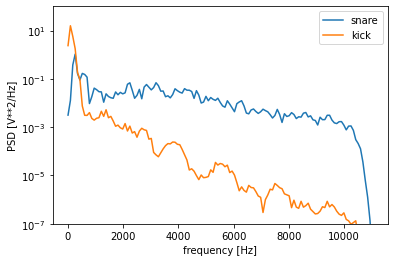

In [34]:
plt.figure()
plt.semilogy(f, X.iloc[1],
            label=labels[1])

plt.semilogy(f, X.iloc[205],
            label=labels[205])

plt.ylim([1e-7, 1e2])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.legend()

In the above plot, two examples are plotted. We see that kick drum has more content in the low frequencies, while the snare drum has a wideband frequency response of content.

# 2.3.1 Solution

In [35]:
#repartition data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#(save for later): drop 1 from the original dataset 
audio_data_dropped = audio_data.drop(1)
X_dropped = audio_data_dropped.drop('label_text',axis=1)

le_drop = preprocessing.LabelEncoder()
labels_drop = audio_data_dropped['label_text']
le_drop.fit(labels_drop)
y_dropped=le_drop.transform(labels_drop)

#Drop one instance and re-run with depth = five
#repartition data
X_train_drop, X_test_drop, y_train_drop, y_test_drop = train_test_split(X_dropped, y_dropped, test_size=0.20, random_state=42)

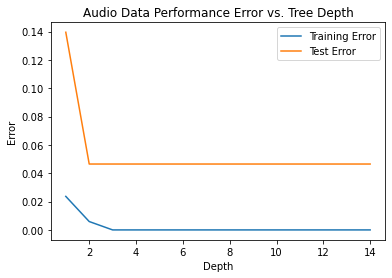

In [36]:
test_err = []
train_err = []
x_axis = range(1,15)

for i in x_axis:
    this_tree = tree.DecisionTreeClassifier(max_depth=i,random_state=42)
    this_tree = this_tree.fit(X_train,y_train)
    this_pred = this_tree.predict(X_test)
    
    this_train = 1-this_tree.score(X_train,y_train)
    this_test = 1-accuracy_score(y_test,this_pred)
    test_err.append(this_test)
    train_err.append(this_train)
    
#plot our training and test errors
plt.plot(x_axis, train_err, label = "Training Error")
plt.plot(x_axis, test_err, label = "Test Error")
plt.legend()
plt.xlabel("Depth")
plt.ylabel("Error")
plt.title("Audio Data Performance Error vs. Tree Depth")
plt.show()

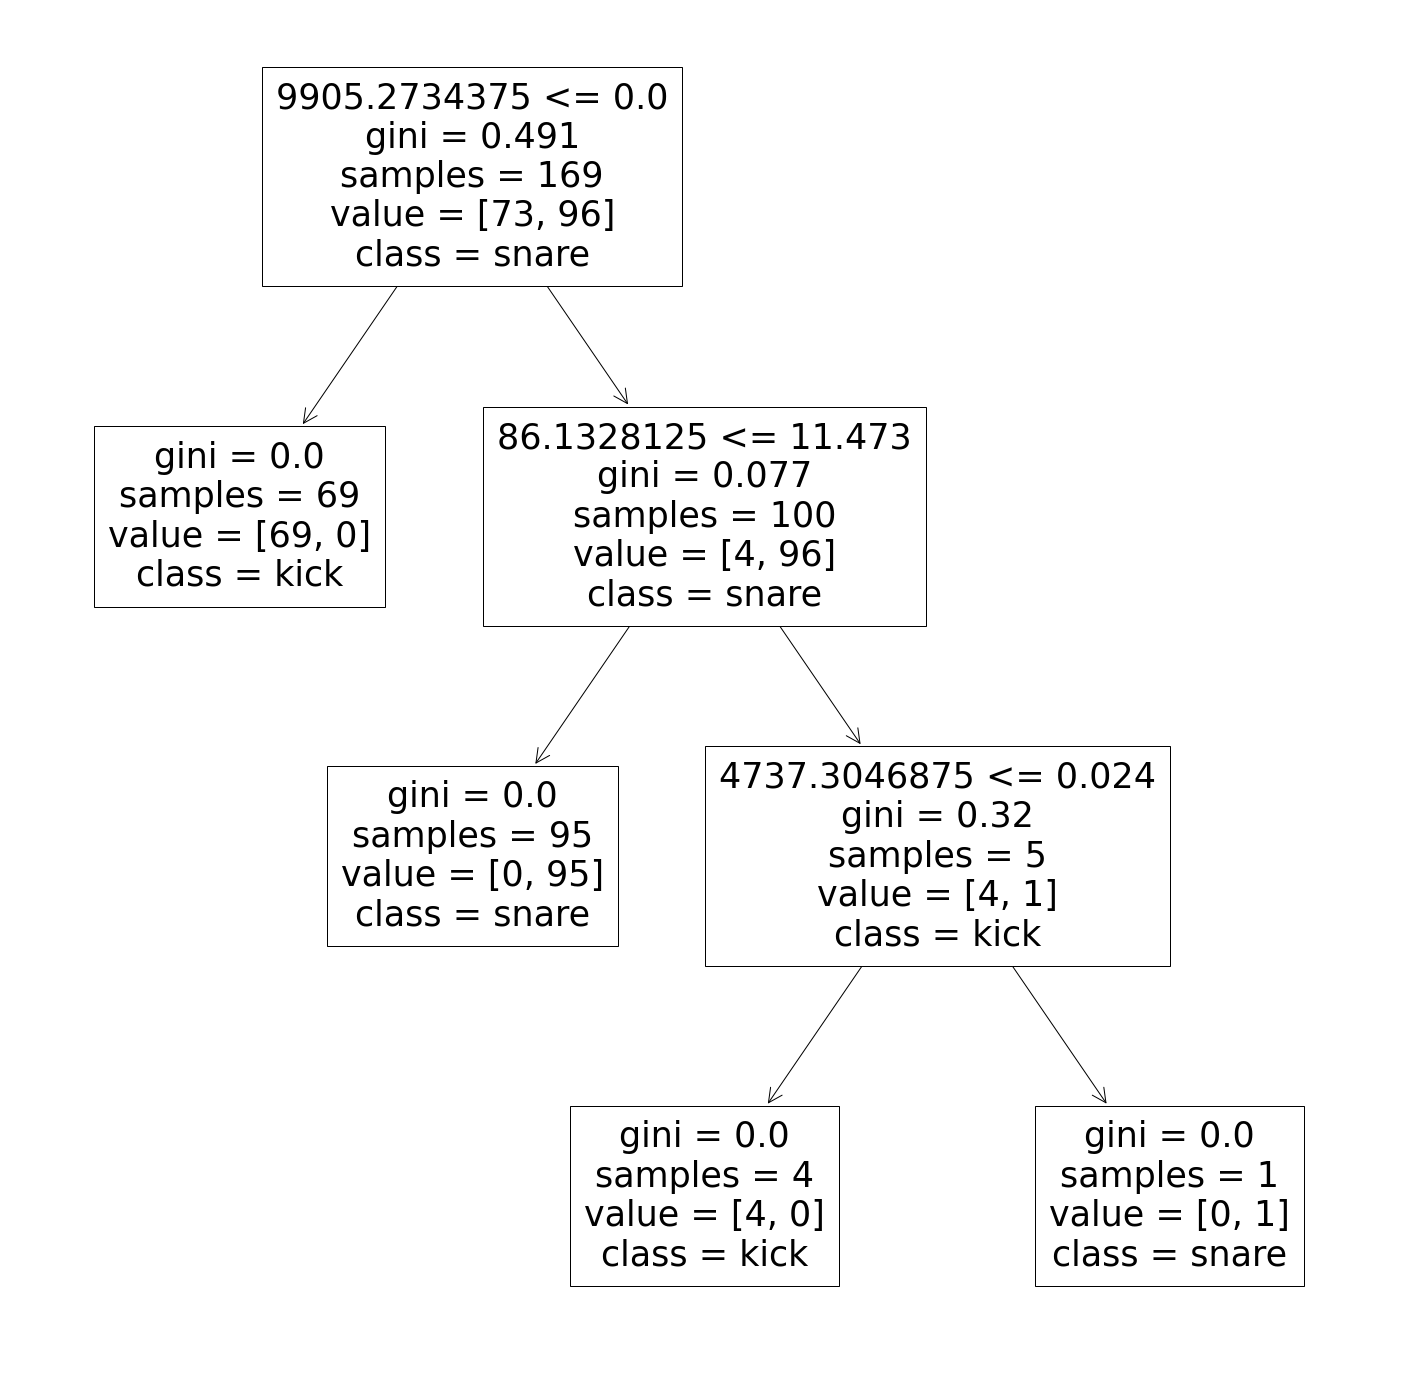

In [37]:
#Plot a tree of depth = 5 
tree_five = tree.DecisionTreeClassifier(max_depth=5,random_state=42)
tree_five = tree_five.fit(X_train,y_train)
five_pred = tree_five.predict(X_test)
five_accuracy = accuracy_score(y_test,five_pred)

#tree plot
fig,ax = plt.subplots(figsize = (25,25))

treeplot = tree.plot_tree(tree_five, feature_names=f,
              class_names = ['kick','snare'],ax=ax) 

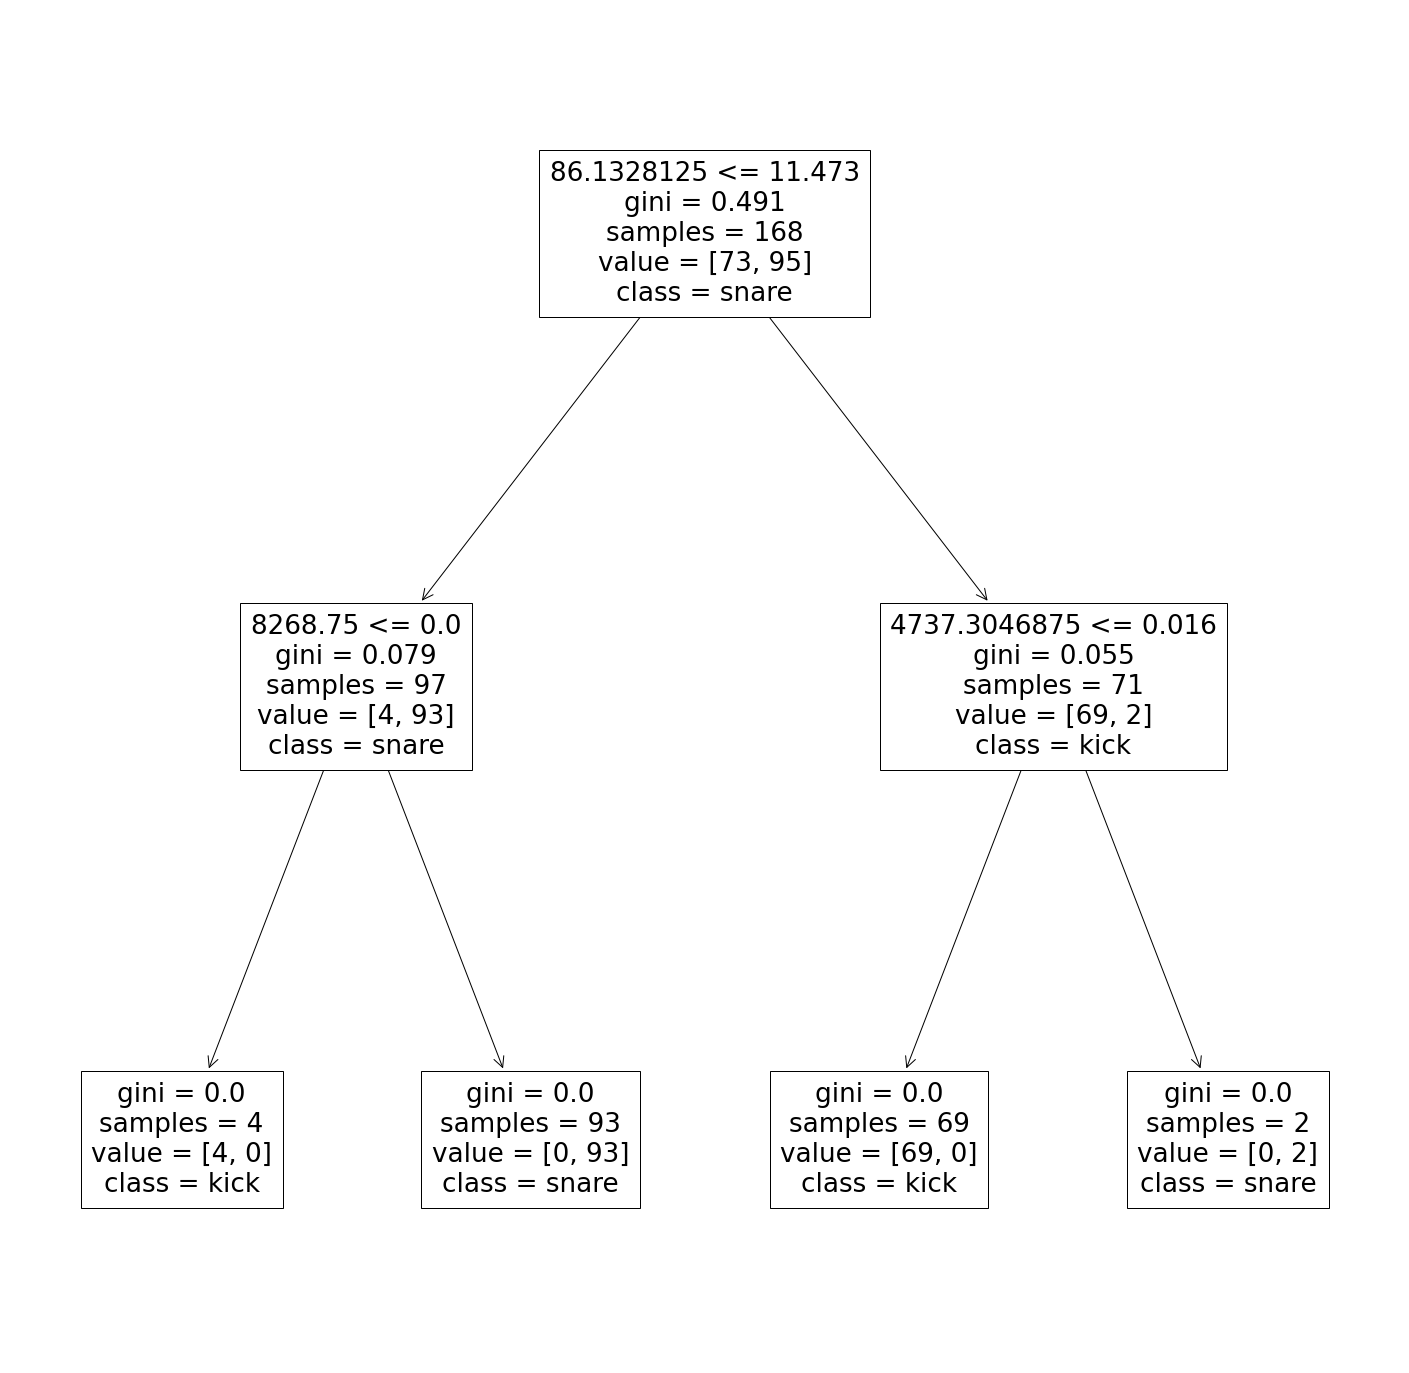

In [38]:
#Plot a tree of depth = 5 
drop_tree_five = tree.DecisionTreeClassifier(max_depth=5,random_state=42)
drop_tree_five = drop_tree_five.fit(X_train_drop,y_train_drop)
drop_five_pred = drop_tree_five.predict(X_test_drop)
drop_five_accuracy = accuracy_score(y_test_drop,drop_five_pred)

#tree plot
fig,ax = plt.subplots(figsize = (25,25))

treeplot = tree.plot_tree(drop_tree_five, feature_names=f,
              class_names = ['kick','snare'],ax=ax) 

### observations:
After dropping just one sample from our decision tree, we find that the max tree depth, despite being five, has resulted in a decision of depth three for the dropped dataset, as opposed to the non-dropped audio data, which resulted in a tree of depth 4.
We can also compare the two accuracies for insight:

In [39]:
print(five_accuracy,drop_five_accuracy)

0.9534883720930233 0.9534883720930233


# 3 : Bad Classifiers 

In [40]:

class BadClassifier():

    def __init__(self):
        pd = __import__('pandas')
        self.label_counts = pd.Series([],dtype=pd.StringDtype()) 
        
    def train(self, y_train):
        train_labels = pd.Series(y_train)
        label_counts = train_labels.value_counts(normalize=True)
        self.label_counts = label_counts.sort_index()

    def make_random_predictions(self, X_test):
        pred_labels=[]
        test_labels = pd.Series(y_test)

        test_label_counts = np.random.multinomial(X_test.shape[0],self.label_counts.values)
        for count,label in zip (test_label_counts,self.label_counts.index.values):

            pred_labels = pred_labels + [label for x in range(0,count)]
        np.random.shuffle(pred_labels)
        return pred_labels

# 3.1 solution 

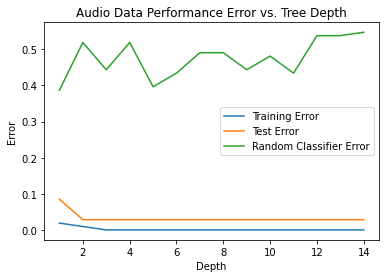

In [41]:
#repartition the audio data to have a 50% test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=42)

test_err = []
train_err = []
rand_err = []
x_axis = range(1,15)

for i in x_axis:
    this_tree = tree.DecisionTreeClassifier(max_depth=i,random_state=42)
    this_tree = this_tree.fit(X_train,y_train)
    this_pred = this_tree.predict(X_test)
    
    this_train = 1-this_tree.score(X_train,y_train)
    this_test = 1-accuracy_score(y_test,this_pred)
    test_err.append(this_test)
    train_err.append(this_train)
    
    #random classifier
    this_bad = BadClassifier()
    this_bad.train(y_train)
    this_bad_pred = this_bad.make_random_predictions(X_test)
    this_bad_err = 1 - accuracy_score(y_test,this_bad_pred)
    rand_err.append(this_bad_err)
    
#plot our training and test errors
plt.plot(x_axis, train_err, label = "Training Error")
plt.plot(x_axis, test_err, label = "Test Error")
plt.plot(x_axis, rand_err, label = "Random Classifier Error")
plt.legend()
plt.xlabel("Depth")
plt.ylabel("Error")
plt.title("Audio Data Performance Error vs. Tree Depth")
plt.show()


When using 50% of the data as our testing set, our random classifier vastly underperforms our decision trees.

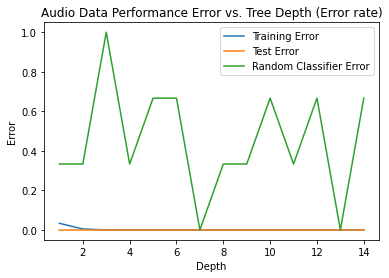

In [42]:
#repartition to make test data 1% of n.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42)

test_err = []
train_err = []
rand_err = []
x_axis = range(1,15)

for i in x_axis:
    this_tree = tree.DecisionTreeClassifier(max_depth=i,random_state=42)
    this_tree = this_tree.fit(X_train,y_train)
    this_pred = this_tree.predict(X_test)
    
    this_train = 1-this_tree.score(X_train,y_train)
    this_test = 1-accuracy_score(y_test,this_pred)
    test_err.append(this_test)
    train_err.append(this_train)
    
    #random classifier
    this_bad = BadClassifier()
    this_bad.train(y_train)
    this_bad_pred = this_bad.make_random_predictions(X_test)
    this_bad_err = 1 - accuracy_score(y_test,this_bad_pred)
    rand_err.append(this_bad_err)
    
#plot our training and test errors
plt.plot(x_axis, train_err, label = "Training Error")
plt.plot(x_axis, test_err, label = "Test Error")
plt.plot(x_axis, rand_err, label = "Random Classifier Error")
plt.legend()
plt.xlabel("Depth")
plt.ylabel("Error")
plt.title("Audio Data Performance Error vs. Tree Depth (Error rate)")
plt.show()

On face value, it seems that the random classifier performs notably better with a smaller test set, but we know that this is largely attributed to random chance and shouldn't be taken as confirmation of better performance.